# Show Case for BOAH - A Tool Suite for Multi-Fidelity Bayesian Optimization & Analysis of Hyperparameters

This toolsuite provides the specification of design spaces, a robust
and efficient combination of Bayesian optimization and HyperBand, and a comprehensive analysis of the optimization process and its outcomes to gain a better understanding.
It makes use of the three highly compatible tools <a href="https://github.com/automl/ConfigSpace" target="_blank">ConfigSpace</a>, <a href="https://github.com/automl/HpBandSter" target="_blank">HpBandSter</a> and <a href="https://github.com/automl/CAVE" target="_blank">CAVE</a> to analyze and visualize the optimization process.

## About this experiment

### Proximal Policy Optimization on the Cartpole Problem

The <a href="https://gym.openai.com/envs/CartPole-v0/" target="_blank">Cartpole Problem</a> is a common benchmark for reinforcement learning agents, we use the implementation of openAI.
<a href="https://arxiv.org/abs/1707.06347" target="_blank">Proximal Policy Optimization</a> is a reinforcement learning strategy with tunable hyperparameters.

### Installation requirements

To run the experiments, please install the <a href="https://github.com/automl/BOAH/blob/master/requirements.txt" target="_blank">requirements</a>, e.g. `pip install -r examples/icml_2018_experiments/requirements.txt`.

## Run the experiment


This examples ships with all the code necessary to reproduce the experiment. Because it takes a few days to generate the data, the results of the optimization are provided in `examples/PPO_on_cartpole`. To reproduce the results, just run:

In [ ]:
from run_BOHB import main
if True:
    main()

## Using the results in CAVE

### Instantiate CAVE

Analyzing the optimization results with CAVE is very straight-forward. If you want to use CAVE interactively in a notebook, set `show_jupyter=True`. Specify which optimization you want to analyze via the `folders` argument and specify `file_format==BOHB`. To analyze how BOHB optimized PPO on the cartpole-problem, run:

In [1]:
from cave.cavefacade import CAVE

cave = CAVE(folders=["NEMO_OUTPUT/BC_1",
                     "NEMO_OUTPUT/BC_2",
                     "NEMO_OUTPUT/BC_3",
                     "NEMO_OUTPUT/BC_4",
                     "NEMO_OUTPUT/BC_5",
                     "NEMO_OUTPUT/BC_6",
                     "NEMO_OUTPUT/BC_7",
                     "NEMO_OUTPUT/BC_8",
                     "NEMO_OUTPUT/BC_9",
                     "NEMO_OUTPUT/BC_10",
                    ],
            output_dir="CAVE_report",  # output for debug/images/etc
            ta_exec_dir=["."],         # Only important for SMAC-results
            file_format='BOHB',        # BOHB
            verbose_level='OFF',
            show_jupyter=True,
           )

To generate the HTML-report you can use the `analyze`-method. The report is located in `output_dir/report.html`, so in this case in `CAVE_report/report.html`.

In [3]:
%%capture
cave.analyze(cfp_time_slider=True)
! firefox CAVE_report/report.html

CAVE is fully compatible with Jupyter notebooks. You can invoke the individual analysis methods as follows.

The most interesting plot for BOHB might be a visualization of the learning curves:

In [2]:
cave.bohb_learning_curves();

Loading BokehJS ...

In [3]:
cave.overview_table();

For each budget, we can list the cost over incumbents:

In [4]:
cave.bohb_incumbents_per_budget();

,budget 1,budget 3,budget 9
batch_size,10,10,8
discount,0.958445,0.958445,0.990177
entropy_regularization,0.219758,0.219758,0.206025
learning_rate,0.00267234,0.00267234,0.00136828
likelihood_ratio_clipping,0.949068,0.949068,0.922201
n_units_1,84,84,126
n_units_2,111,111,121
Cost,123.0,140.0,179.889


For parameter-importance analysis, CAVE uses <a href="https://github.com/automl/ParameterImportance" target="_blank">PIMP</a> , a package that provides multiple approaches to parameter-importance analysis. We can easily invoke them via CAVE, of course. To estimate the importance, random forests are used to predict performances of configurations that were not executed. This is difficult for big budgets with few configurations.

We can access the individual budgets via the 'run'-keyword-argument of each analysis-method.

In [5]:
cave.cave_fanova(run='budget_3');

-------------------- Single importance: --------------------,--------------------
discount,93.3616 +/- 6.8328
learning_rate,1.4867 +/- 5.3417
likelihood_ratio_clipping,0.1709 +/- 0.4095
entropy_regularization,0.0562 +/- 0.0447
-------------------- Pairwise importance: --------------------,--------------------
discount & entropy_regularization,1.9094 +/- 1.1343
discount & learning_rate,0.5841 +/- 1.1321
discount & likelihood_ratio_clipping,0.5112 +/- 1.0799
discount & batch_size,0.4967 +/- 0.6323
likelihood_ratio_clipping & entropy_regularization,0.0906 +/- 0.3238


In [6]:
cave.local_parameter_importance(run='budget_3');

For each budget, we can compare the different parameter-importance-methods that have already been run:

In [7]:
cave.pimp_comparison_table(run='budget_3');

Loading BokehJS ...

To analyze BOHB's behaviour, we can check out the configurator footprint, cost-over-time and parallel coordinated parameters:

In [8]:
cave.configurator_footprint(use_timeslider=True, num_quantiles=5);

Loading BokehJS ...

In [9]:
cave.cost_over_time();

Loading BokehJS ...

/home/shuki/VirtualEnvs/CBC/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


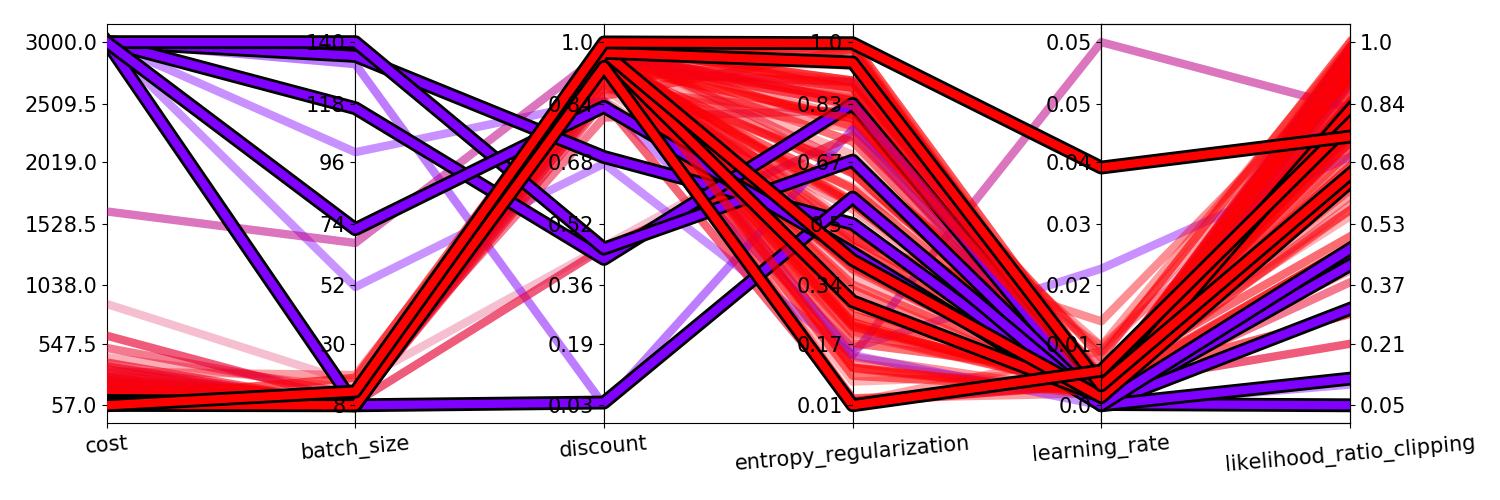

In [10]:
cave.parallel_coordinates(run='budget_1');